# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [3]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [30]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [31]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [32]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [33]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [8]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

#### Question 1: Find the 10 countries with most projects

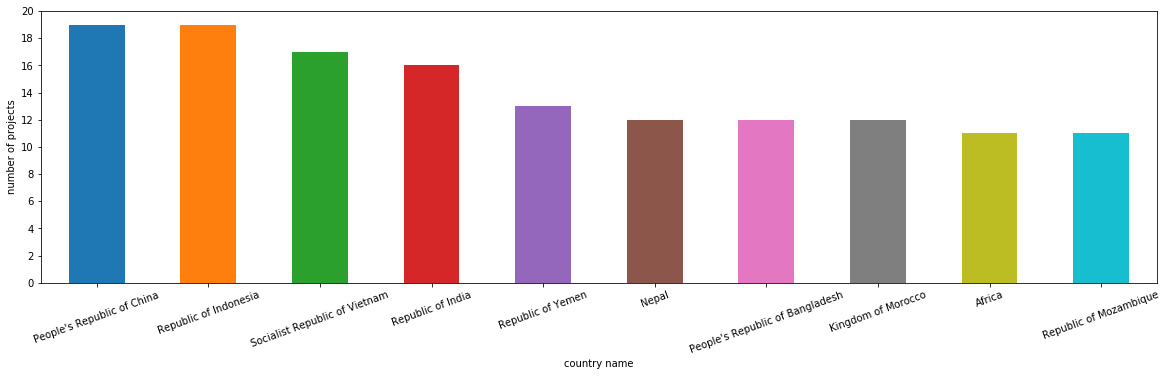

In [14]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Read json as panda DataFrame
df = pd.read_json('data/world_bank_projects.json')

# Show the 10 counties with most projects in a bar plot
plt.figure(figsize=(20,5))
df.groupby('countryname').id.nunique().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xticks(rotation = 20)
plt.yticks(np.arange(0, 21, step=2))
plt.xlabel('country name')
plt.ylabel('number of projects')
plt.show()

#### Question 2: Find the top 10 major project themes (using column 'mjtheme_namecode')

In [23]:
# Open the json file
with open('data/world_bank_projects.json','r') as jsonfile:
    json_data=json.load(jsonfile)

# Use jsom normalize to populate nested elements
temp_df=json_normalize(json_data,'mjtheme_namecode')

# Print the top 10 projects
print('The top 10 projects are:\n')
print(temp_df[temp_df.name!=''].name.value_counts().head(10))

The top 10 projects are:

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Economic management                              33
Name: name, dtype: int64


#### Question 3: In question 2 above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [39]:
# Group the DataFrame by name and create a Series with the code as value
series=temp_df.groupby('name').code.max()

# Remove the empty name from the Series
series=series[series.index!='']

# Create a DataFrame with the Series and code as the column. Then reset the index to switch name from index to column
code_name_df = pd.DataFrame(series,columns=['code']).reset_index()

# print code_name_df
print('The project codes and names are:')
code_name_df

The project codes and names are:


,name,code
0,Economic management,1
1,Environment and natural resources management,11
2,Financial and private sector development,4
3,Human development,8
4,Public sector governance,2
5,Rule of law,3
6,Rural development,10
7,Social dev/gender/inclusion,7
8,Social protection and risk management,6
9,Trade and integration,5


In [40]:
# Create a new DataFrame with three columns, code, name_original which has empty elements and name with no empty element
temp_df_cleaned = pd.merge(temp_df,code_name_df,on='code',suffixes=['_original','_cleaned'])
temp_df_cleaned.head()

,code,name_original,name_cleaned
0,8,Human development,Human development
1,8,,Human development
2,8,Human development,Human development
3,8,Human development,Human development
4,8,Human development,Human development


In [42]:
# Print the top 10 projects after filling the empty names
print('The top 10 projects after filling the empty project names are:\n')
print(temp_df_cleaned.name_cleaned.value_counts().head(10))

The top 10 projects after filling the empty project names are:

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name_cleaned, dtype: int64
